In [1]:
# IND320 Project Part 1 - Dashboard Basics
# Student: Hasan Elahi
# Date: September 18, 2025
# GitHub Repository: https://github.com/hasanelahi7/hasanelahi7-ind320-dashboard
# Streamlit App: https://hasanelahi7-ind320-dashboard.streamlit.app/

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the CSV data
df = pd.read_csv('open-meteo-subset.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset shape: (8760, 6)

Column names:
['time', 'temperature_2m (°C)', 'precipitation (mm)', 'wind_speed_10m (m/s)', 'wind_gusts_10m (m/s)', 'wind_direction_10m (°)']

First few rows:


,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01T00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01T01:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01T02:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01T03:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01T04:00,-2.7,0.0,10.6,22.8,284


In [3]:
# Print contents in a relevant way
print("=== DATASET OVERVIEW ===")
print(f"Data covers: {df['time'].min()} to {df['time'].max()}")
print(f"Total records: {len(df)}")
print("\n=== SUMMARY STATISTICS ===")
print(df.describe())

print("\n=== DATA TYPES ===")
print(df.dtypes)

print("\n=== SAMPLE OF DATA ===")
print(df.sample(10))  # Show 10 random rows

=== DATASET OVERVIEW ===
Data covers: 2020-01-01T00:00 to 2020-12-30T23:00
Total records: 8760

=== SUMMARY STATISTICS ===
       temperature_2m (°C)  precipitation (mm)  wind_speed_10m (m/s)  \
count          8760.000000         8760.000000           8760.000000   
mean             -0.394909            0.222854              3.661689   
std               6.711903            0.493747              2.253210   
min             -19.300000            0.000000              0.100000   
25%              -4.900000            0.000000              1.800000   
50%              -1.000000            0.000000              3.300000   
75%               4.100000            0.200000              5.100000   
max              19.900000            5.800000             13.600000   

       wind_gusts_10m (m/s)  wind_direction_10m (°)  
count           8760.000000             8760.000000  
mean               8.300719              212.209589  
std                5.098909               91.371980  
min         

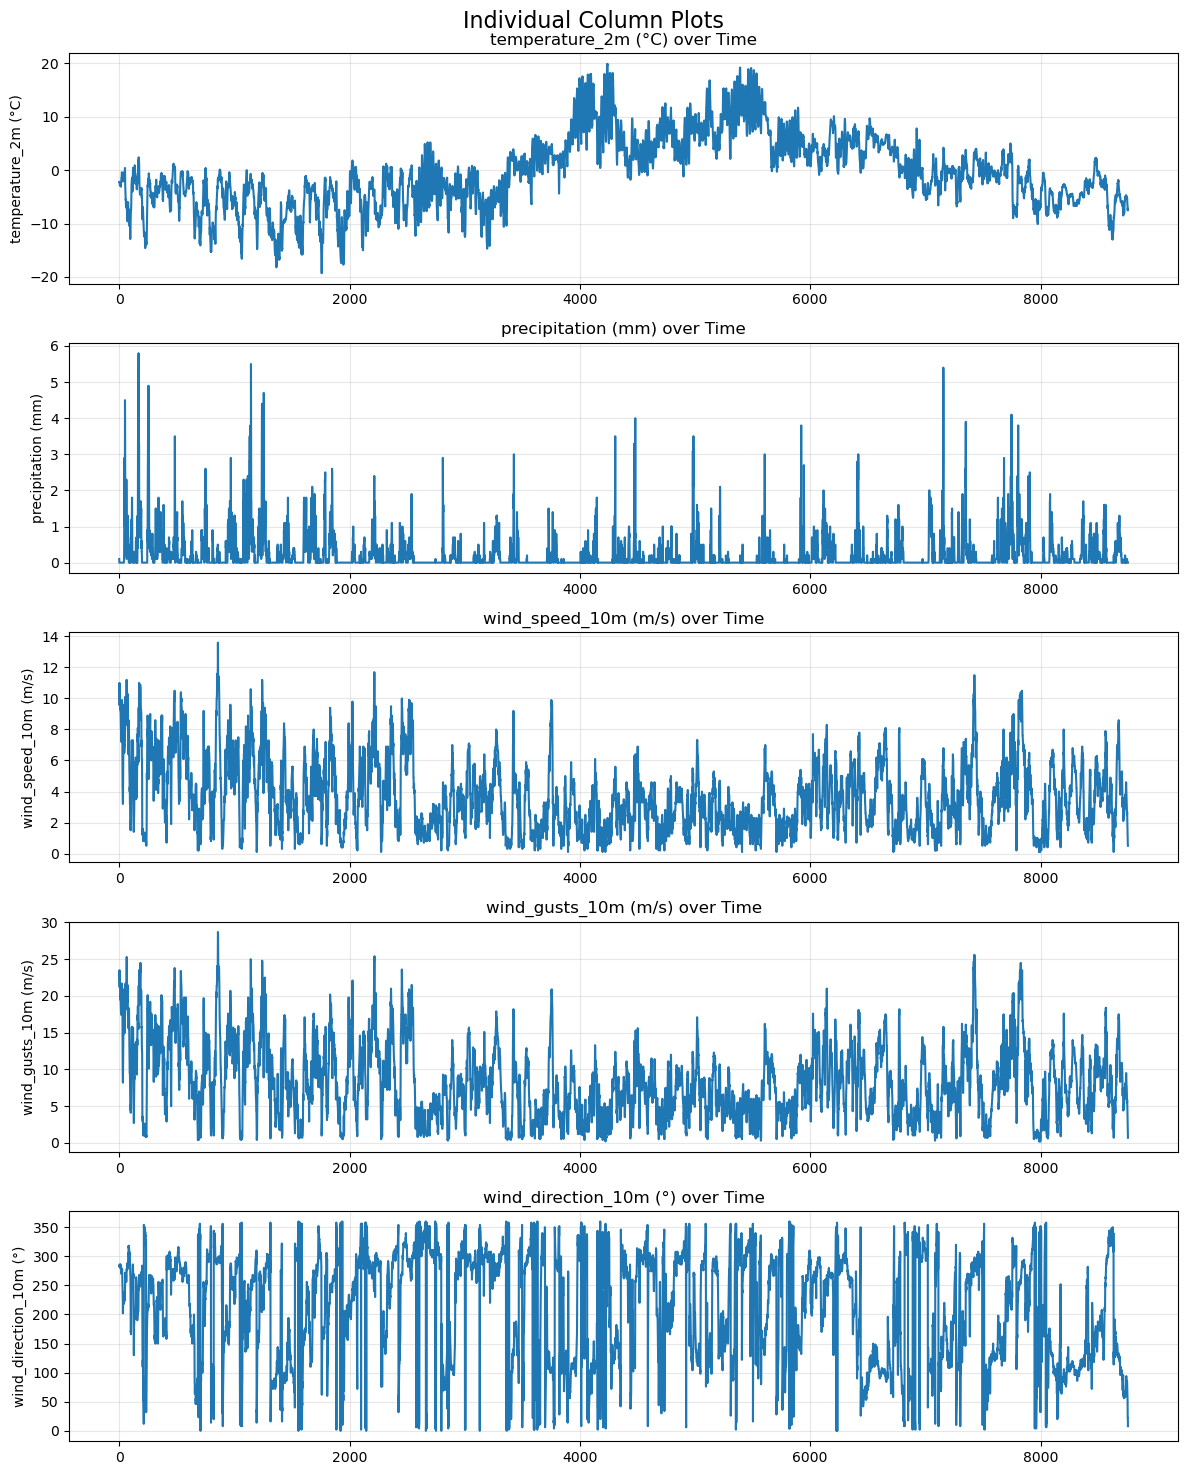

In [4]:
# Plot each column separately (excluding time)
columns_to_plot = ['temperature_2m (°C)', 'precipitation (mm)', 'wind_speed_10m (m/s)', 
                  'wind_gusts_10m (m/s)', 'wind_direction_10m (°)']

fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(12, 15))
fig.suptitle('Individual Column Plots', fontsize=16)

for i, column in enumerate(columns_to_plot):
    axes[i].plot(df[column])
    axes[i].set_title(f'{column} over Time')
    axes[i].set_ylabel(column)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

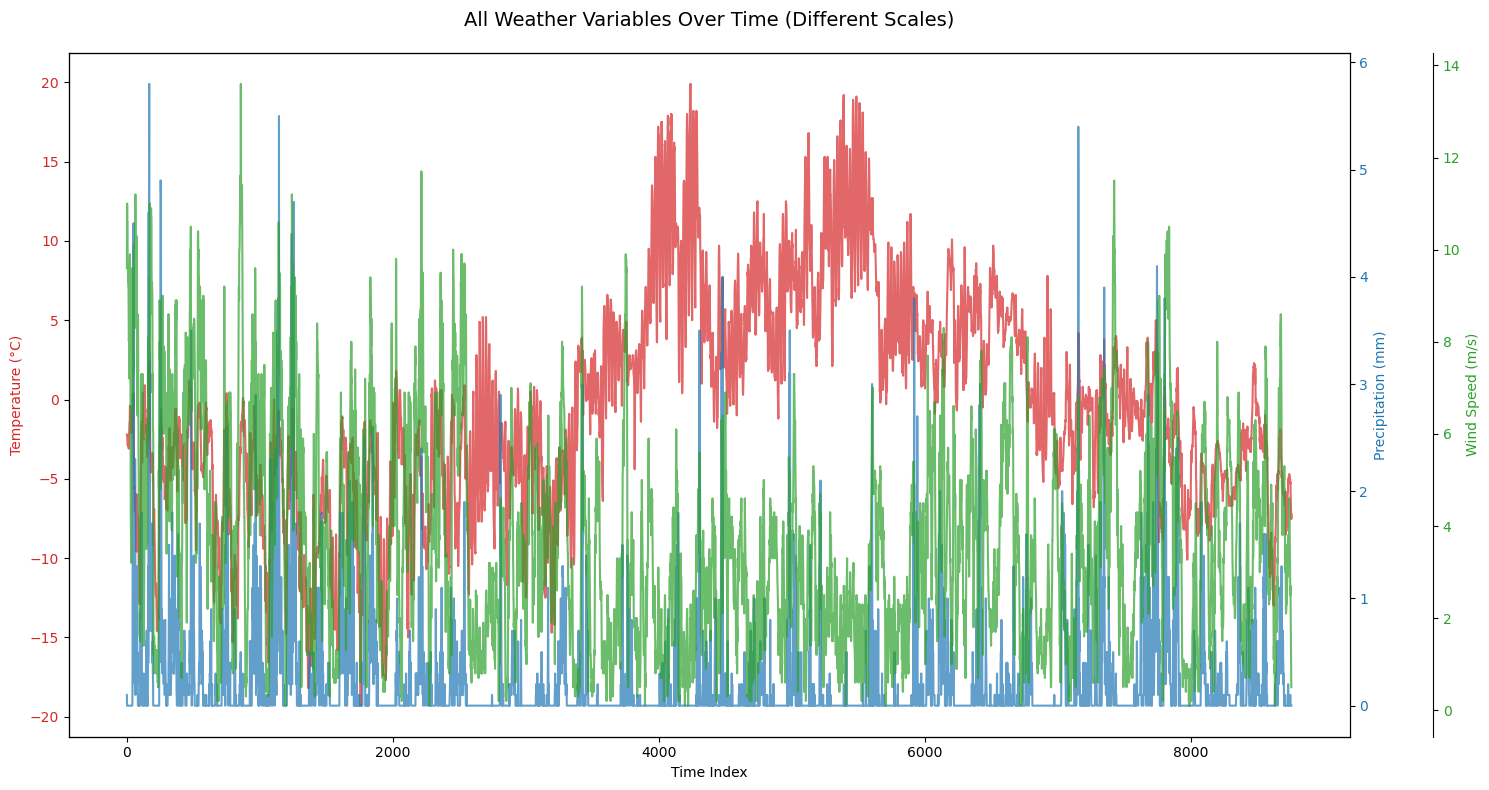

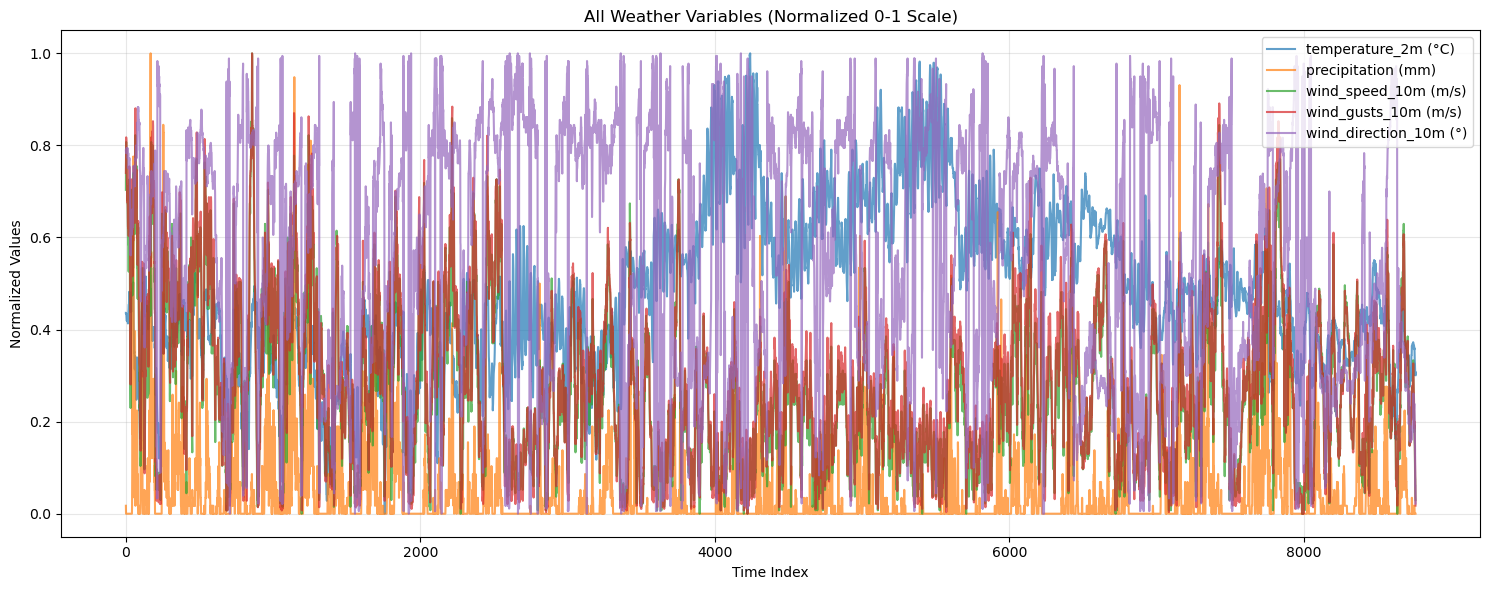

In [5]:
# Plot all columns together - considering different scales
# We'll use subplots with secondary y-axes to handle different scales

fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot temperature (main scale)
color = 'tab:red'
ax1.set_xlabel('Time Index')
ax1.set_ylabel('Temperature (°C)', color=color)
line1 = ax1.plot(df['temperature_2m (°C)'], color=color, label='Temperature', alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

# Create second y-axis for precipitation
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Precipitation (mm)', color=color)
line2 = ax2.plot(df['precipitation (mm)'], color=color, label='Precipitation', alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color)

# Create third y-axis for wind data
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
color = 'tab:green'
ax3.set_ylabel('Wind Speed (m/s)', color=color)
line3 = ax3.plot(df['wind_speed_10m (m/s)'], color=color, label='Wind Speed', alpha=0.7)
ax3.tick_params(axis='y', labelcolor=color)

plt.title('All Weather Variables Over Time (Different Scales)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Alternative: Normalized plot (all on same scale 0-1)
fig, ax = plt.subplots(figsize=(15, 6))

# Normalize each column to 0-1 scale for comparison
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df[columns_to_plot]), 
                            columns=columns_to_plot)

for column in columns_to_plot:
    ax.plot(df_normalized[column], label=column, alpha=0.7)

ax.set_title('All Weather Variables (Normalized 0-1 Scale)')
ax.set_xlabel('Time Index')
ax.set_ylabel('Normalized Values')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [7]:
# =============================================================================
# PROJECT LOG (300-500 words)
# =============================================================================

## Project Experience Log

**Jupyter Notebook Experience:**
Working with Jupyter Lab for this assignment provided hands-on experience with data analysis workflows. Loading the weather dataset using pandas was straightforward, and the ability to see immediate results from each code cell made the exploratory data analysis process intuitive. The dataset contained hourly weather measurements for a full year (8,760 rows), including temperature, precipitation, and wind data.

The plotting requirements challenged me to think about data visualization best practices. Creating individual plots for each variable revealed distinct patterns - temperature showing clear seasonal variation, precipitation occurring in sporadic bursts, and wind data displaying more random fluctuations. The most challenging aspect was plotting all variables together due to their different scales and units.

I solved this by creating two approaches: a multi-axis plot preserving original units, and a normalized plot scaling all variables to 0-1 for comparison. This taught me that data visualization often requires multiple perspectives to tell the complete story.

**Streamlit Experience:**
The Streamlit component introduces web application development to data science. Building an interactive dashboard requires thinking beyond static analysis to user experience. The multi-page structure with navigation sidebar creates a professional interface, while interactive widgets like selectboxes and sliders allow users to explore data dynamically.

Caching mechanisms in Streamlit optimize performance by avoiding repeated data loading. This is crucial for responsive applications. The deployment process through GitHub integration demonstrates modern DevOps practices where code changes automatically update the live application.

**Technical Challenges:**
Managing different data scales in combined visualizations required research into matplotlib's multiple y-axis functionality. Understanding how Streamlit's widget state management works was initially confusing but became clearer through experimentation.

**Learning Outcomes:**
This project bridges the gap between data analysis and application development. Jupyter notebooks serve as the development environment for exploration and documentation, while Streamlit transforms that analysis into accessible web applications. The GitHub integration demonstrates version control best practices and continuous deployment workflows essential in data science careers.

The combination of these tools creates a complete data science pipeline from exploration to deployment, providing practical experience with industry-standard workflows.

In [ ]:
## AI Tool Usage

**AI Tools Used:**
- ChatGPT for syntax guidance only

**Specific Usage:**
- Matplotlib multi-axis plotting syntax
- Basic Streamlit widget syntax reference

All analysis, code logic, and problem-solving was done independently.